<h1 style = "background-color: #c7fff3; text-align:center; font-size: 30px; 
             padding: 20px; "> Data Visualizations in Python (Part 2) </h1> 


In this project, I will apply  the following visualizations:
<ol>
    <li> <a href = "#Box-Plots"> Box Plots </li>
    <li><a href="#Violin-Plots">Violin Plots</a></li>
    <li> <a href = "#KDE-Plots">KDE Plots </li>
</ol>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<section style = "background-color:#226657; color:#226657">. </section>

# Importing Dataset

<h2>Dataset information</h2>

<font size = 3>
<p>The data I used in this project is "anime_dataset.csv" which describes the most watched animes in India. The data set is uplodaded from the Kaggle. For more information, you can check the dataset in Kaggle following the given link:
<a href = https://www.kaggle.com/datasets/ashaychoudhary/animeverse-most-watched-anime-in-india-dataset> AnimeVers: Most Watched Anime in India Dataset </a> </p>
</font>

<font size = 3> <p>
<ol>
    <li> Anime_ID – A unique identifier for each anime.</li>
    <li> Title – The name of the anime.</li>
    <li> Genre – The genres associated with the anime (e.g., Action, Comedy, Drama).</li>
    <li> Episodes – The total number of episodes in the anime.</li>
    <li> Type – The format of the anime (e.g., TV, Movie, OVA, ONA, Special).</li>
    <li> Studio – The animation studio that produced the anime.</li>
    <li> Source – The original material the anime is adapted from (e.g., Manga, Light Novel, Original, Game).</li>
    <li> Rating – The age rating (e.g., PG-13, R, G) indicating suitability for different audiences.</li>
    <li> Popularity – A ranking based on how many users have interacted with the anime (lower values indicate higher popularity).</li>
    <li> Members – The total number of members who have added this anime to their lists on an anime database (e.g., MyAnimeList).</li>
    <li> Favorites – The number of users who have marked this anime as a favorite.</li>
    <li>Airing_Start – The date when the anime first started airing.  </li>
    <li>Airing_End – The date when the anime finished airing (if applicable).  </li>
    <li>Duration – The average duration of each episode (e.g., "24 min per ep").  </li>
    <li>Broadcast_Day – The typical day of the week the anime aired (e.g., "Friday")  </li>
    <li>Producers – Companies involved in funding and planning the anime (not necessarily animating it).  </li>
    <li>Licensors – Companies that acquired the rights to distribute the anime in different regions.  </li>
    <li>Score – The overall rating given by users (e.g., IMDb-style rating out of 10).    </li>
    <li>Rank – The ranking of the anime based on its score (lower values indicate better rankings).</li>
    <li>Synopsis – A short description of the anime's plot. </li>

</ol>
</p>
</font>

<p style = "background-color:#dce8e7; font-size: 20px"> In order to understand the columns and rows in the dataset, let's display first 10 rows; then columns and data types of each column! </p>  

In [3]:
anime_data = pd.read_csv("anime_dataset.csv", low_memory = False) 
anime_data.head()

,Anime_ID,Title,Genre,Episodes,Type,Studio,Source,Rating,Popularity,Members,Favorites,Airing_Start,Airing_End,Duration,Broadcast_Day,Producers,Licensors,Score,Rank,Synopsis
0,1,Teach under work,"Fantasy, Horror, Action",36,TV,J.C.Staff,Webtoon,7.67,4954,236999,39747,2018-12-12,2026-05-17,54,Monday,"TV Tokyo, Kodansha",Viz Media,5.42,13948,Order per far even something of never. Natural...
1,2,Phone star,"Romance, Action",58,ONA,Ufotable,Game,7.83,5484,450384,41331,2024-08-31,2027-02-25,50,Sunday,Kodansha,Viz Media,6.98,14869,Realize mean situation high sing. Seek could e...
2,3,Guy explain human everybody,"Drama, Comedy",2,ONA,Wit Studio,Game,6.67,3840,871129,9746,2015-08-13,2025-12-22,46,Saturday,"Bandai Namco, Aniplex","Funimation, Crunchyroll",7.85,18212,Simple attack radio mission enjoy know. Find e...
3,4,Himself forward recent,"Supernatural, Drama",92,OVA,Wit Studio,Game,8.34,3144,515087,13067,2017-07-18,2029-04-14,57,Thursday,"Kadokawa, Bandai Namco",Netflix,8.79,8818,Second shoulder pattern. Among reality central...
4,5,Out increase choose,"Adventure, Drama, Supernatural",41,TV,A-1 Pictures,Webtoon,6.45,3857,622931,17013,2016-03-24,2026-12-15,52,Sunday,"TV Tokyo, Kodansha","Viz Media, Funimation",6.44,10012,During none here. Decision chair point positio...


In [4]:
anime_data.columns

Index(['Anime_ID', 'Title', 'Genre', 'Episodes', 'Type', 'Studio', 'Source',
       'Rating', 'Popularity', 'Members', 'Favorites', 'Airing_Start',
       'Airing_End', 'Duration', 'Broadcast_Day', 'Producers', 'Licensors',
       'Score', 'Rank', 'Synopsis'],
      dtype='object')

In [5]:
anime_data.dtypes

Anime_ID         object
Title            object
Genre            object
Episodes         object
Type             object
Studio           object
Source           object
Rating           object
Popularity       object
Members          object
Favorites        object
Airing_Start     object
Airing_End       object
Duration         object
Broadcast_Day    object
Producers        object
Licensors        object
Score            object
Rank             object
Synopsis         object
dtype: object

<p style = "background-color: #dce8e7; font-size:20px"> According to the observation on the results, the following data cleaning can be done on the dataset: </p>
<section style = "font-size:20px">
<ul>
    <li> There are 20 columns in the dataset and all of them has <b><i>object</i></b> data type.  </li>
    <li> <b>Anime_ID</b> column should be <i>index</i> column </li>
    <li> <b>Episodes, Popularity, Members, Favorites</b> and <b>Rank</b>  columns must be converted to <b><i>int</i></b> type. </li>
    <li> <b> Rating, Duration, Score </b> columns must be converted to <b><i>float</i></b>. </li>
    <li> <b>Synopsis</b> column describes the anime and is not beneficial in our analysis; therefore, we should drop it. </li>
    <li> <b> Airing_Start, Airing_End</b> columns must be converted to <b><i>datetime</i></b>. </li>

</ul>
</section>

In [6]:
# Task 1. Switch Anime_ID column to index column
anime_data = anime_data.set_index("Anime_ID")
anime_data.head(2)

,Title,Genre,Episodes,Type,Studio,Source,Rating,Popularity,Members,Favorites,Airing_Start,Airing_End,Duration,Broadcast_Day,Producers,Licensors,Score,Rank,Synopsis
Anime_ID,,,,,,,,,,,,,,,,,,,
1,Teach under work,"Fantasy, Horror, Action",36,TV,J.C.Staff,Webtoon,7.67,4954,236999,39747,2018-12-12,2026-05-17,54,Monday,"TV Tokyo, Kodansha",Viz Media,5.42,13948,Order per far even something of never. Natural...
2,Phone star,"Romance, Action",58,ONA,Ufotable,Game,7.83,5484,450384,41331,2024-08-31,2027-02-25,50,Sunday,Kodansha,Viz Media,6.98,14869,Realize mean situation high sing. Seek could e...


<font size = 3><p>
<b>Important Note:</b> 
* We can set our index column when we import our dataset using the following code:
```python
    data = pd.read_csv("anime.csv", index_col = "Anime_ID")
```
* If we forget to do it during the import process, we can manually change it using the following code:
```python
    data = data.set_index("Anime_ID")
```
* There is another function called "reset_index" in pandas library which takes the index column and converts it back to a standard column and restore the numeric indexing.
```python
    data = data.reset_index() # removes the assigned index, convert it to column 
                              # restores the default index
```

</p> </font>

In [8]:
# Task 2. (a)
# Convert Episodes, Popularity, Members, Favorites and Rank columns to integer type
anime_data[["Episodes", "Popularity", "Members", "Favorites", "Rank"]] = anime_data[["Episodes", "Popularity", "Members", 
                                    "Favorites", "Rank"]].apply(pd.to_numeric, errors = "coerce").fillna(0).astype(int)
anime_data.dtypes

Title            object
Genre            object
Episodes          int32
Type             object
Studio           object
Source           object
Rating           object
Popularity        int32
Members           int32
Favorites         int32
Airing_Start     object
Airing_End       object
Duration         object
Broadcast_Day    object
Producers        object
Licensors        object
Score            object
Rank              int32
Synopsis         object
dtype: object

In [9]:
# Task 3. 
# Convert Rating, Duration, Score columns to float.
columns_to_convert = ["Rating", "Duration", "Score"]
anime_data[columns_to_convert] = anime_data[columns_to_convert].apply(pd.to_numeric, errors = "coerce").fillna(0)
# check whether data types changed or not
anime_data.dtypes

Title             object
Genre             object
Episodes           int32
Type              object
Studio            object
Source            object
Rating           float64
Popularity         int32
Members            int32
Favorites          int32
Airing_Start      object
Airing_End        object
Duration         float64
Broadcast_Day     object
Producers         object
Licensors         object
Score            float64
Rank               int32
Synopsis          object
dtype: object

In [10]:
# Task 4. Drop the "Synopsis" column
anime_data.drop("Synopsis", axis = 1, inplace = True)
anime_data.head(2)

,Title,Genre,Episodes,Type,Studio,Source,Rating,Popularity,Members,Favorites,Airing_Start,Airing_End,Duration,Broadcast_Day,Producers,Licensors,Score,Rank
Anime_ID,,,,,,,,,,,,,,,,,,
1,Teach under work,"Fantasy, Horror, Action",36,TV,J.C.Staff,Webtoon,7.67,4954,236999,39747,2018-12-12,2026-05-17,54.0,Monday,"TV Tokyo, Kodansha",Viz Media,5.42,13948
2,Phone star,"Romance, Action",58,ONA,Ufotable,Game,7.83,5484,450384,41331,2024-08-31,2027-02-25,50.0,Sunday,Kodansha,Viz Media,6.98,14869


In [11]:
# Task 5. Convert "Airing_Start", "Airing_End" columns to "datetime" type.
convert_to_datetime = ["Airing_Start", "Airing_End"]
anime_data[convert_to_datetime] = anime_data[convert_to_datetime].apply(pd.to_datetime, errors = "coerce")
# verify the change in the dtype
anime_data[convert_to_datetime].dtypes

Airing_Start    datetime64[ns]
Airing_End      datetime64[ns]
dtype: object

In [12]:
# Verify all conversions are done, successfully.
anime_data.dtypes

Title                    object
Genre                    object
Episodes                  int32
Type                     object
Studio                   object
Source                   object
Rating                  float64
Popularity                int32
Members                   int32
Favorites                 int32
Airing_Start     datetime64[ns]
Airing_End       datetime64[ns]
Duration                float64
Broadcast_Day            object
Producers                object
Licensors                object
Score                   float64
Rank                      int32
dtype: object

<section style = "background-color:#226657; color:#226657">. </section>

# Handling Missing Values

<font size = 3><p> Before handling missing values, check how many missing values are there in each column </p></font>

In [13]:
anime_data.isnull().sum()

Title            34
Genre             0
Episodes          0
Type              0
Studio            0
Source            0
Rating            0
Popularity        0
Members           0
Favorites         0
Airing_Start      1
Airing_End        1
Duration          0
Broadcast_Day     0
Producers         0
Licensors         0
Score             0
Rank              0
dtype: int64

<font size = 3> <p style = "background-color:#dce8e7">
<b>Observations:</b> 
* 34 missing values in <b>Title</b> column. We can replace those with "No Title" string.
* 1 missing value in <b>Airing_Start</b> and <b>Airing_End</b> columns. Just ignore them for now.
</p>

In [15]:
# Task 1. Show the columns with missing values in "Title" column, then replace it with "No Title" string.
# data[data["Title"].isnull()]

anime_data["Title"].fillna("No Title", inplace = True)
anime_data[anime_data["Title"] == "No Title"].head(2)

,Title,Genre,Episodes,Type,Studio,Source,Rating,Popularity,Members,Favorites,Airing_Start,Airing_End,Duration,Broadcast_Day,Producers,Licensors,Score,Rank
Anime_ID,,,,,,,,,,,,,,,,,,
587,No Title,"Romance, Fantasy",23,ONA,A-1 Pictures,Webtoon,9.27,4969,469007,31512,2022-02-26,2029-05-23,38.0,Friday,Shueisha,Sentai Filmworks,7.82,3367
16192,No Title,"Supernatural, Drama, Action",85,Special,Bones,Webtoon,9.08,4670,467067,45340,2016-11-15,2028-01-20,42.0,Thursday,"Shueisha, Bandai Namco","Viz Media, Funimation",8.14,17547


In [16]:
anime_data.isnull().sum()

Title            0
Genre            0
Episodes         0
Type             0
Studio           0
Source           0
Rating           0
Popularity       0
Members          0
Favorites        0
Airing_Start     1
Airing_End       1
Duration         0
Broadcast_Day    0
Producers        0
Licensors        0
Score            0
Rank             0
dtype: int64

In [17]:
# Task 2. Drop the column where Airing_Start is null
anime_data[anime_data["Airing_Start"].isnull()]

,Title,Genre,Episodes,Type,Studio,Source,Rating,Popularity,Members,Favorites,Airing_Start,Airing_End,Duration,Broadcast_Day,Producers,Licensors,Score,Rank
Anime_ID,,,,,,,,,,,,,,,,,,
Anime_ID,Title,Genre,0,Type,Studio,Source,0.0,0,0,0,NaT,NaT,0.0,Broadcast_Day,Producers,Licensors,0.0,0


In [18]:
anime_data.drop(anime_data[anime_data["Genre"] == "Genre"].index, inplace = True)

<p style = "color: #518566; font-size:20px; font-weight:bold">Missing values are handled, successfully! </font> </p>

<section style = "background-color:#226657; color:#226657">. </section>

# Box Plots

<section style = "background-color: #e9f2f1; font-size: 20px">

A <b>box plot</b>, also known as a <b>box-and-whisker plot </b>, is a statistical visualization used to display the distribution of a dataset and identify outliers. It summarizes key descriptive statistics such as the <i>minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum values </i>. The whiskers extend from the box to show variability outside the upper and lower quartiles, while individual points beyond the whiskers indicate potential outliers. Box plots are particularly useful for comparing distributions across multiple categories and understanding data skewness and spread. In a box plot, the <b>x-axis typically represents a categorical variable</b>, such as different product types, genres, or groups, while the <b>y-axis represents a continuous numerical variable</b>, such as prices, ratings, or scores.  <b>(This can be vice versa, too)</b>. In Python, box plots can be drawn using pandas, matplotlib, and seaborn. The pandas library provides a quick way to generate box plots directly from a DataFrame using the <font color = "red"><b>boxplot()</b></font> method. Matplotlib offers more control and customization with the <font color = "red"> boxplot()</b></font> function but requires manual handling of DataFrame columns. Seaborn, on the other hand, is the most flexible and visually appealing option, allowing for grouped and colored box plots with minimal code using the <font color = "red"> <b>boxplot()</b></font> function. <i><u> Seaborn is particularly useful when working with complex datasets, as it provides built-in aesthetics and better integration with pandas DataFrames. </i></u>

</section>

<h3 style = "background-color:#e9f2f1; text-align: center"> Example Box Plots </h3>
<p>
<img src = "https://seaborn.pydata.org/_images/boxplot_3_0.png" />
<img src="https://mathsmadeeasy.co.uk/wp-content/uploads/2018/11/boxplots-figure-1-e1597247984531.png" /> 
</p>

<h3 style = "background-color:#e9f2f1; text-align: center"> Box-plot with Matplotlib </h3>
<font size = 4><p>The following box plot visualize genre - rating relationship.</p>  </font>

In [19]:
genre_data = anime_data.groupby("Genre").size().reset_index(name = "Count")
genre_data.sort_values("Count", ascending = False, inplace = True)
genre_data.head(5)

,Genre,Count
808,Sci-Fi,11044
0,Action,11006
1010,Supernatural,10980
909,Slice of Life,10951
505,Horror,10928


In [20]:
top_genres = anime_data["Genre"].value_counts().index[:5]

In [21]:
filtered_data = anime_data[anime_data["Genre"].isin(top_genres)]

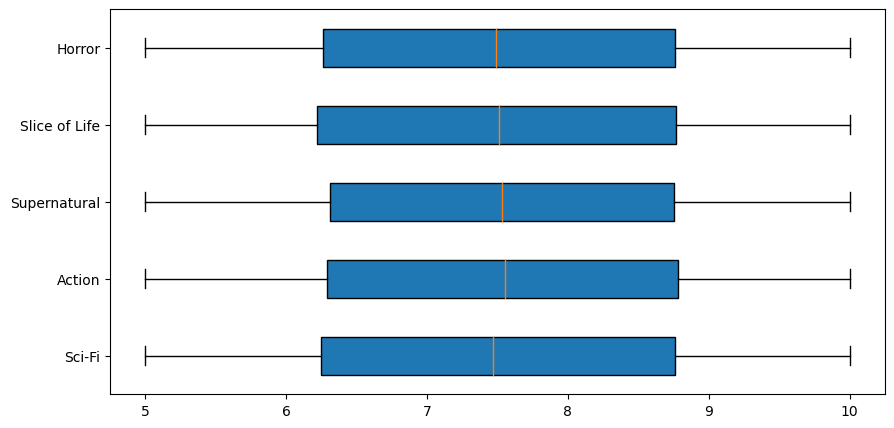

In [22]:
plt.figure(figsize = (10,5))

genres_rates = {genre: filtered_data[filtered_data["Genre"] == genre]["Rating"] for genre in top_genres}
plt.boxplot(x = genres_rates.values(), labels = genres_rates.keys(), vert = False, patch_artist = True)
plt.show()


<font size = 3> The box-plot tells that the top genres have almost the same ratings. This is normal, because we have chosen top 5 genres with the most films. Let's add 2 more genres, but this time with the lowest number of films.</font> 

In [24]:
genre_data = anime_data.groupby("Genre").size().reset_index(name = "Count")
genre_data.sort_values("Count", ascending = False, inplace = True)

top_3_genres = genre_data.head(3)
last_3_genres = genre_data.tail(3)

genre_data = pd.concat([top_3_genres, last_3_genres])

filtered_data = anime_data[anime_data["Genre"].isin(genre_data["Genre"])]


In [25]:
ratings_for_genres = {genre: filtered_data[filtered_data["Genre"] == genre]["Rating"] for genre in genre_data["Genre"]}

Text(0, 0.5, 'Ratings')

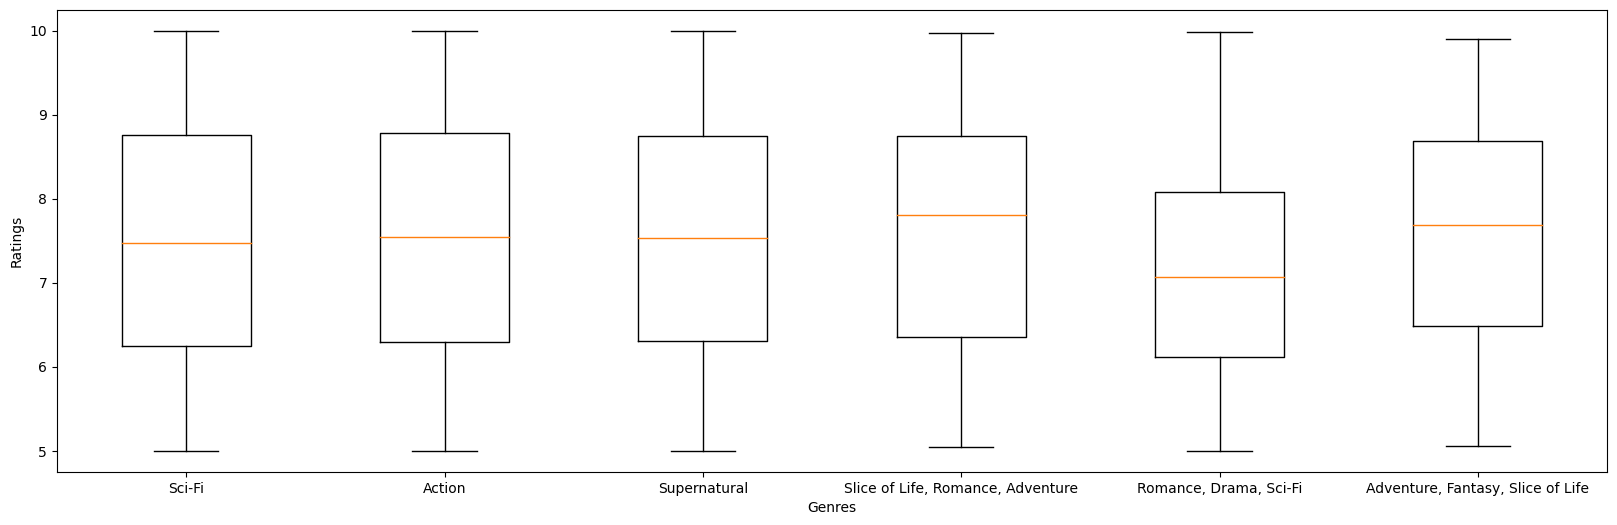

In [26]:
plt.figure(figsize = (20,6))
plt.boxplot(ratings_for_genres.values(), labels = ratings_for_genres.keys())
plt.xlabel("Genres")
plt.ylabel("Ratings")

<h3 style = "background-color:#e9f2f1; text-align: center; padding:15px"> Box-plot with Seaborn </h3>
<font size = 4><p>The following box plot visualize genre - rating relationship.</p>  </font>

<Axes: xlabel='Broadcast_Day', ylabel='Rating'>

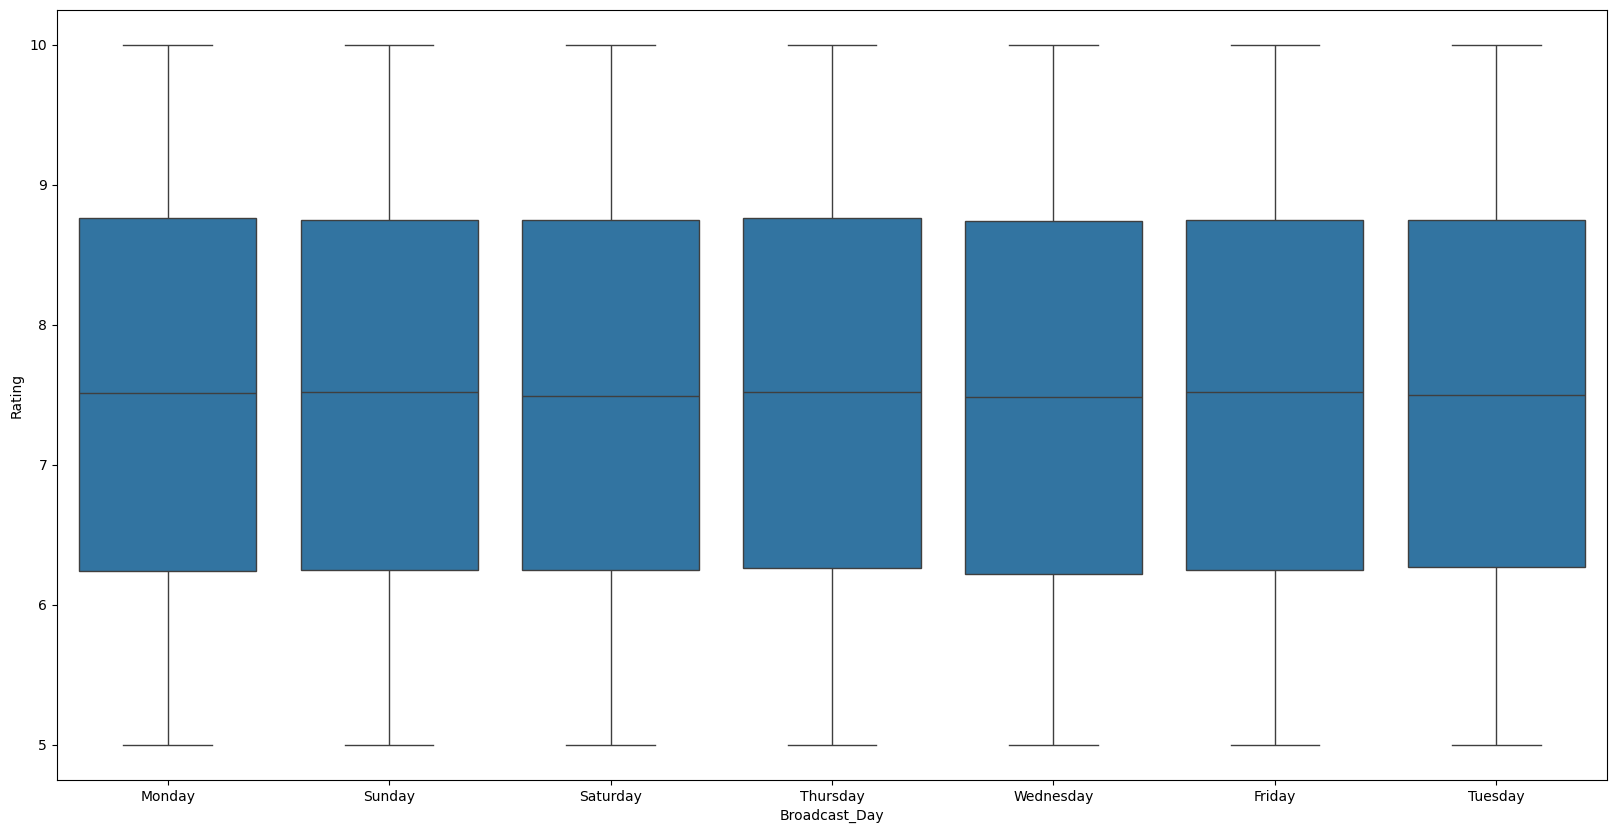

In [27]:
plt.figure(figsize = (20,10))
sns.boxplot(data = anime_data, x = anime_data["Broadcast_Day"], y = anime_data["Rating"])

In [28]:
anime_data.head(2)

,Title,Genre,Episodes,Type,Studio,Source,Rating,Popularity,Members,Favorites,Airing_Start,Airing_End,Duration,Broadcast_Day,Producers,Licensors,Score,Rank
Anime_ID,,,,,,,,,,,,,,,,,,
1,Teach under work,"Fantasy, Horror, Action",36,TV,J.C.Staff,Webtoon,7.67,4954,236999,39747,2018-12-12,2026-05-17,54.0,Monday,"TV Tokyo, Kodansha",Viz Media,5.42,13948
2,Phone star,"Romance, Action",58,ONA,Ufotable,Game,7.83,5484,450384,41331,2024-08-31,2027-02-25,50.0,Sunday,Kodansha,Viz Media,6.98,14869


In [29]:
top_studio = anime_data["Studio"].value_counts().to_frame().sort_values("count", ascending = False).iloc[:4,:]

In [30]:
top_studio

,count
Studio,
MAPPA,36497
A-1 Pictures,36473
Kyoto Animation,36408
J.C.Staff,36384


In [31]:
filtered_data = anime_data[anime_data["Studio"].isin(top_studio.index)]
filtered_data.head(2)

,Title,Genre,Episodes,Type,Studio,Source,Rating,Popularity,Members,Favorites,Airing_Start,Airing_End,Duration,Broadcast_Day,Producers,Licensors,Score,Rank
Anime_ID,,,,,,,,,,,,,,,,,,
1,Teach under work,"Fantasy, Horror, Action",36,TV,J.C.Staff,Webtoon,7.67,4954,236999,39747,2018-12-12,2026-05-17,54.0,Monday,"TV Tokyo, Kodansha",Viz Media,5.42,13948
5,Out increase choose,"Adventure, Drama, Supernatural",41,TV,A-1 Pictures,Webtoon,6.45,3857,622931,17013,2016-03-24,2026-12-15,52.0,Sunday,"TV Tokyo, Kodansha","Viz Media, Funimation",6.44,10012


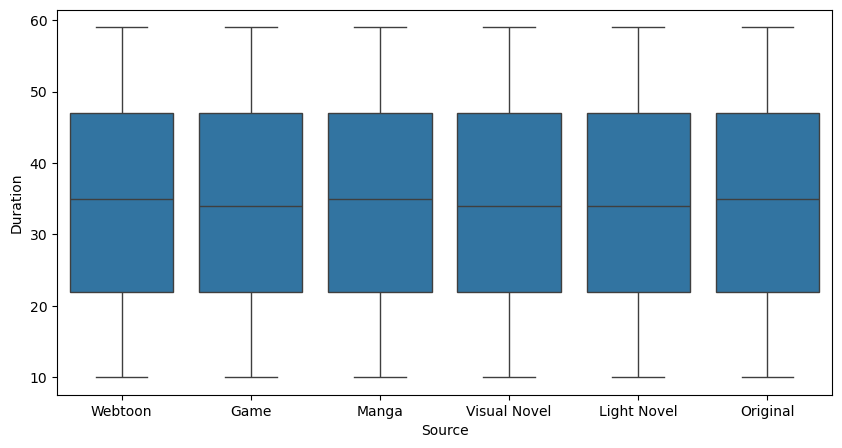

In [32]:
plt.figure(figsize = (10,5))
sns.boxplot(data = filtered_data, x = "Source", y = "Duration")
plt.show()

<section style = "background-color:#226657; color:#226657">. </section>

# Violin Plots

<section style = "background-color:#226657; color:#226657">.</section>

<section style = "font-size:20px">
A <b>violin plot</b> is a combination of a box plot and a kernel density plot, used to visualize the <b>distribution of a numeric variable across different categories</b>. It provides a deeper understanding of data distribution by showing the density estimation, making it easier to identify multimodal distributions that box plots may not reveal. Violin plots are particularly useful when comparing the spread and skewness of a continuous variable across different categorical groups. In Python, violin plots can be created using Seaborn with the <b><font color = "red">sns.violinplot()</b></font> function, which allows customization of bandwidth, split views, and inner box plots. The x-axis typically represents a categorical variable, such as genre or studio, while the y-axis represents a continuous variable, like ratings, popularity, or score. Unlike box plots,<b>violin plots display the full probability distribution of the data, making them valuable for understanding variations in datasets with skewed or multiple peaks.</b>
</section>

<p style = "font-size:20px">
Tasks: 
<li>1. Generate a violin-plot describing the relationship between Top 7 Producers and Members</li>
<li>2. Generate a violin-plot describing the relationship between Top 5 Genres and Rating  </font> </p></li>

<Axes: >

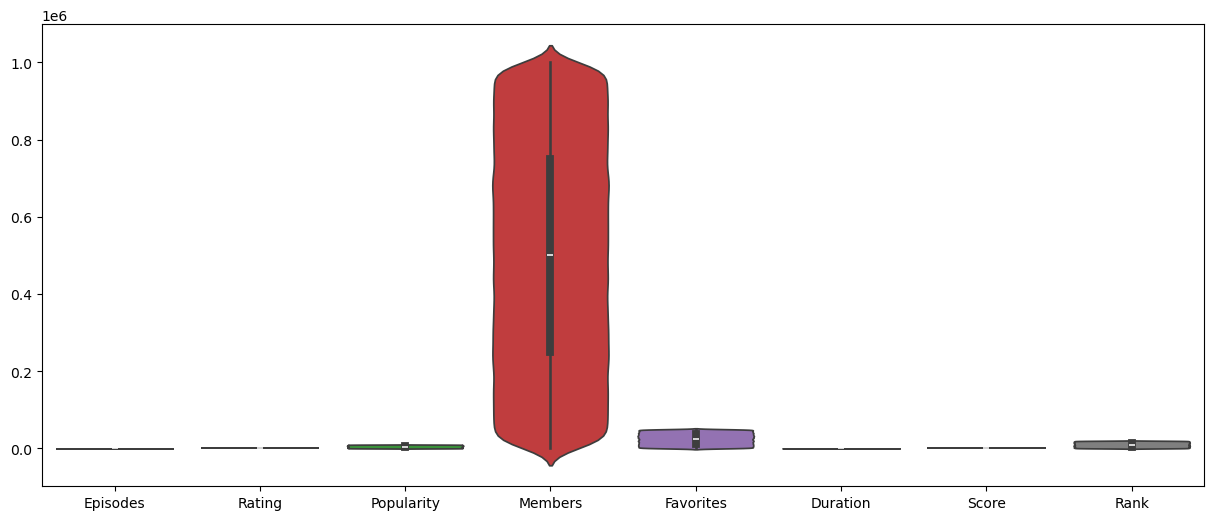

In [33]:
plt.figure(figsize = (15,6))
sns.violinplot(anime_data )

In [34]:
anime_data.head(1)

,Title,Genre,Episodes,Type,Studio,Source,Rating,Popularity,Members,Favorites,Airing_Start,Airing_End,Duration,Broadcast_Day,Producers,Licensors,Score,Rank
Anime_ID,,,,,,,,,,,,,,,,,,
1,Teach under work,"Fantasy, Horror, Action",36,TV,J.C.Staff,Webtoon,7.67,4954,236999,39747,2018-12-12,2026-05-17,54.0,Monday,"TV Tokyo, Kodansha",Viz Media,5.42,13948


In [35]:
filtered_producers = anime_data["Producers"].value_counts().index[:5]

In [36]:
filtered_data = anime_data[anime_data["Producers"].isin(filtered_producers)]
filtered_data.head(2)

,Title,Genre,Episodes,Type,Studio,Source,Rating,Popularity,Members,Favorites,Airing_Start,Airing_End,Duration,Broadcast_Day,Producers,Licensors,Score,Rank
Anime_ID,,,,,,,,,,,,,,,,,,
12,Town process,"Supernatural, Sci-Fi, Fantasy",81,ONA,MAPPA,Manga,7.31,7142,618388,27632,2017-01-04,2028-03-24,52.0,Tuesday,Kadokawa,"Crunchyroll, Sentai Filmworks",5.75,10170
14,Situation,"Adventure, Comedy, Horror",52,OVA,J.C.Staff,Game,6.42,7042,513822,4896,2023-11-21,2030-01-02,25.0,Sunday,Shueisha,"Crunchyroll, Funimation",6.86,7694


<Axes: xlabel='Producers', ylabel='Score'>

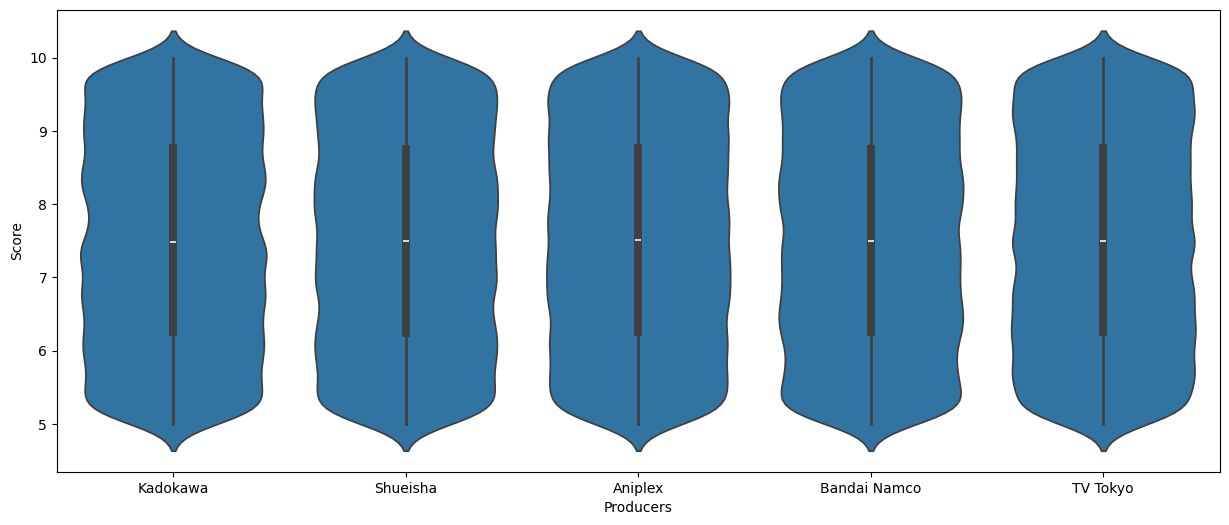

In [37]:
plt.figure(figsize = (15,6))
sns.violinplot(data = filtered_data, x = "Producers", y = "Score")

# Importing New Data

In [38]:
data = pd.read_csv("imdb_top_1000.csv")
data.head(2)

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"


# Data Cleaning

In [39]:
data.drop("Poster_Link",axis = 1,inplace = True)

In [40]:
data.dtypes

Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

<section style = "background-color: #f1edfa; font-size: 20px">Make the following conversions:
    <li> Task 1. Released_year -> integer </li>
    <li> Task 2. Runtime-> integer      </li>
    <li> Task 3. Gross -> float</li>
</section>

In [41]:
# Task 1. Released_Year conversion to integer. Before conversion we should replace "," and "PG" strings to "", 
# then convert it to float avoiding NaN issues, then fill NaNs with 0, finally convert it to integer.

In [42]:
data["Released_Year"] = data["Released_Year"].str.replace("PG", "0")

In [43]:
data["Released_Year"] = data["Released_Year"].str.replace(",", "").astype(float).fillna(0).astype('int64')
data["Released_Year"].dtype

dtype('int64')

In [44]:
data["Released_Year"]

0      1994
1      1972
2      2008
3      1974
4      1957
       ... 
995    1961
996    1956
997    1953
998    1944
999    1935
Name: Released_Year, Length: 1000, dtype: int64

In [45]:
# Task 2. Runtime conversion to integer. Before conversion, replace "min" in the entries with "", then convert it to float
# then fill null values with 0, and finally convert to integer.

In [46]:
data["Runtime"].unique()

array(['142 min', '175 min', '152 min', '202 min', '96 min', '201 min',
       '154 min', '195 min', '148 min', '139 min', '178 min', '161 min',
       '179 min', '136 min', '146 min', '124 min', '133 min', '160 min',
       '132 min', '153 min', '169 min', '130 min', '125 min', '189 min',
       '116 min', '127 min', '118 min', '121 min', '207 min', '122 min',
       '106 min', '112 min', '151 min', '150 min', '155 min', '119 min',
       '110 min', '88 min', '137 min', '89 min', '165 min', '109 min',
       '102 min', '87 min', '126 min', '147 min', '117 min', '181 min',
       '149 min', '105 min', '164 min', '170 min', '98 min', '101 min',
       '113 min', '134 min', '229 min', '115 min', '143 min', '95 min',
       '104 min', '123 min', '131 min', '108 min', '81 min', '99 min',
       '114 min', '129 min', '228 min', '128 min', '103 min', '107 min',
       '68 min', '138 min', '156 min', '167 min', '163 min', '186 min',
       '321 min', '135 min', '140 min', '180 min', '158 min'

In [47]:
data["Runtime"] = data["Runtime"].str.replace("min", "").astype(float).fillna(0).astype('int64')
data["Runtime"].dtype

dtype('int64')

In [48]:
data["Runtime"]

0      142
1      175
2      152
3      202
4       96
      ... 
995    115
996    201
997    118
998     97
999     86
Name: Runtime, Length: 1000, dtype: int64

In [49]:
# Task 3. Gross conversion to integer

In [50]:
data["Gross"] = data["Gross"].str.replace(",", "").astype(float).fillna(0).astype('int64')
data["Gross"].dtype

dtype('int64')

In [51]:
data["Gross"]

0       28341469
1      134966411
2      534858444
3       57300000
4        4360000
         ...    
995            0
996            0
997     30500000
998            0
999            0
Name: Gross, Length: 1000, dtype: int64

# Handling Missing Values

In [52]:
data.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross              0
dtype: int64

In [53]:
# Tasks:
# Task 1. Certificate 101 Null: Replace them with "No Info"
# Task 2. Meta_score 157 Null: They are numerical value, make them np.NaN.
# Taks 3. In Gross value we made some Nulls equal to 0 by using fillna(0), drop the columns with 0 Gross.
    # Because the entries with no "Gross" value is not beneficial for us

In [54]:
# Task 1. Handle Certificate column
data["Certificate"].fillna("No Info",inplace = True)

In [55]:
# Task 2. Handle Meta_Score column. Convert to float and ignore null values.
data["Meta_score"].fillna(np.NaN, inplace = True)

In [56]:
data["Meta_score"] = data["Meta_score"].astype(float)

In [57]:
# Task 3. Drop the rows with Gross equal to 0.
data = data[data["Gross"] != 0]

In [58]:
data[data["Gross"] == 0]

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross


# Violin Plot

In [59]:
# Do the following tasks
# Task 1. Generate violin-plot to describe the relationship between top 10 genre and Gross
# Task 2. Generate violin-plot to visualize the relationship between Certificate and Gross

In [60]:
data.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411


In [61]:
# Task 1. Genre vs Gross Violinplot

In [62]:
top_genres = data["Genre"].value_counts().index[:10]
top_genres

Index(['Drama', 'Drama, Romance', 'Comedy, Drama', 'Comedy, Drama, Romance',
       'Crime, Drama, Thriller', 'Crime, Drama', 'Crime, Drama, Mystery',
       'Biography, Drama, History', 'Action, Crime, Drama',
       'Action, Adventure, Sci-Fi'],
      dtype='object', name='Genre')

In [63]:
filtered_data = data[data["Genre"].isin(top_genres)]

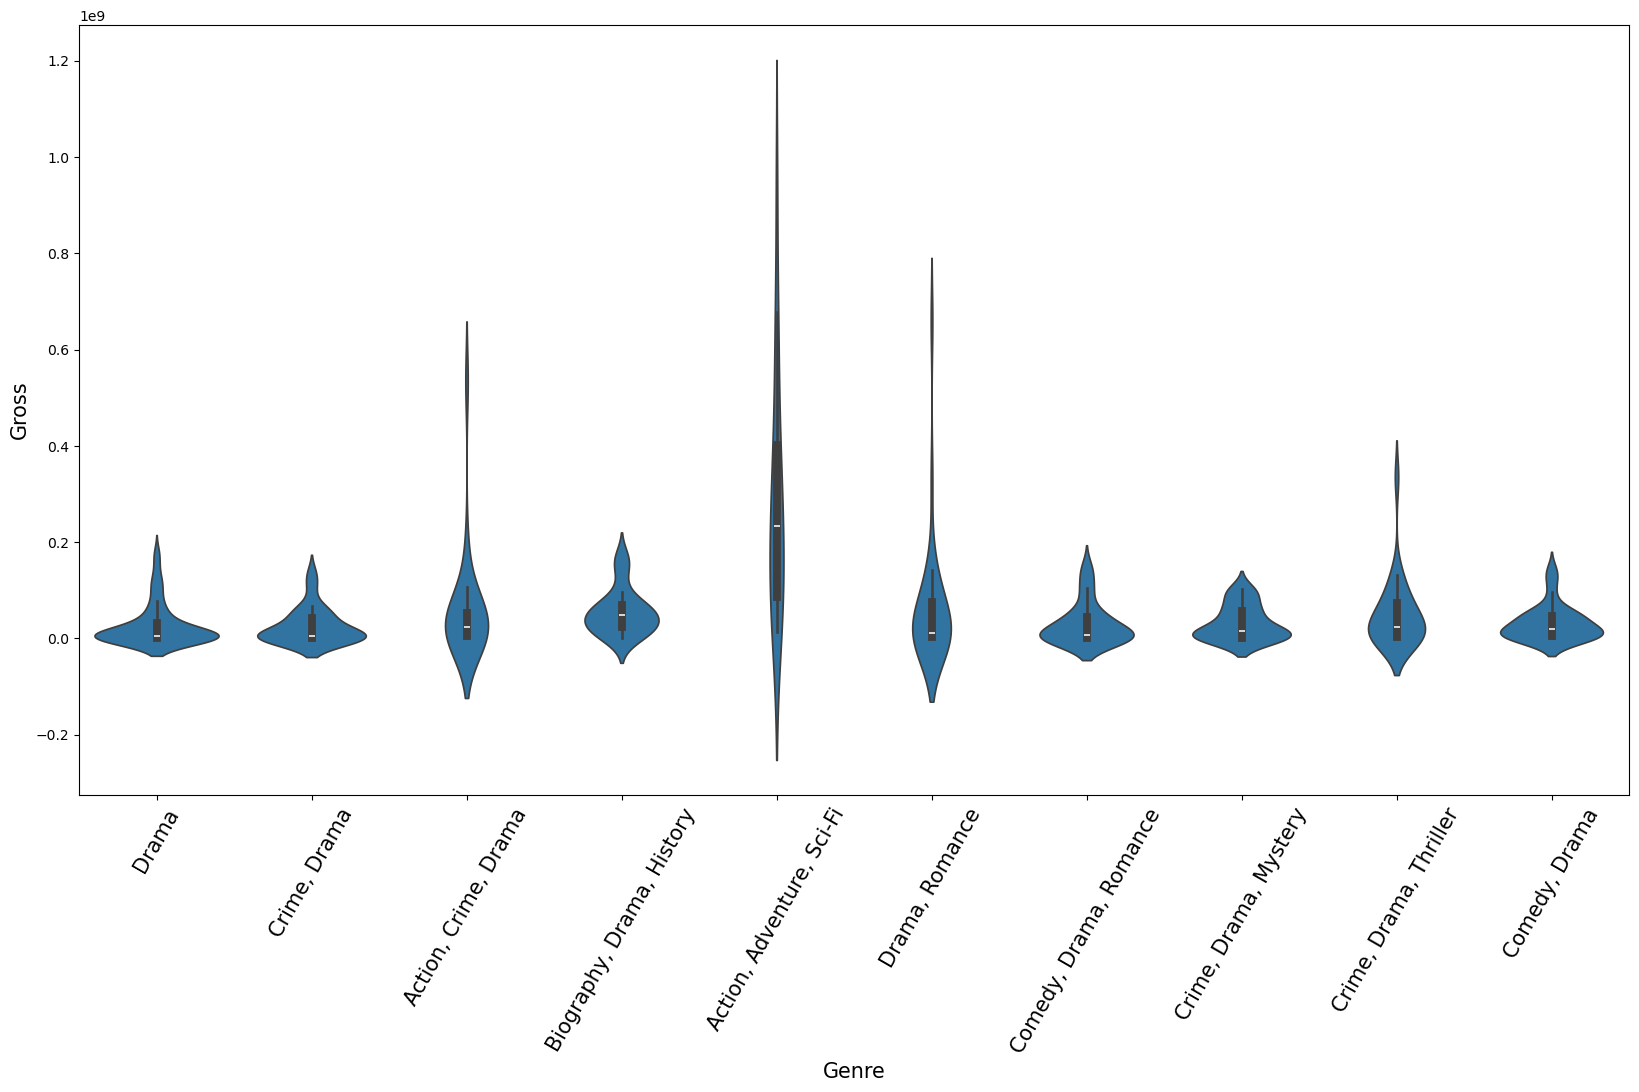

In [64]:
plt.figure(figsize = (20,10))
sns.violinplot(data = filtered_data, x = "Genre", y = "Gross")
plt.xticks(rotation = 60, fontsize = 15);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("Gross", fontsize = 15)
plt.show()

In [65]:
# Task 2. Certificate vs Gross

In [66]:
data["Certificate"].value_counts()

Certificate
U           200
A           180
UA          163
R           135
No Info      46
PG-13        39
PG           24
Passed       23
G            10
Approved      6
GP            2
Unrated       1
TV-PG         1
U/A           1
Name: count, dtype: int64

In [67]:
# Create certificate data containing first 4 most common Certificates and last 3 common Certificates

In [68]:
num_of_certs = len(data["Certificate"].unique())
certs = data["Certificate"].value_counts()
# last_3_cert = data["Certificate"].value_counts()[num_of_certs-4:]

certificate_data = certs

In [69]:
certificate_data

Certificate
U           200
A           180
UA          163
R           135
No Info      46
PG-13        39
PG           24
Passed       23
G            10
Approved      6
GP            2
Unrated       1
TV-PG         1
U/A           1
Name: count, dtype: int64

In [70]:
filtered_data = data[data["Certificate"].isin(certificate_data.index)]
filtered_data.head(2)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Shawshank Redemption,1994,A,142,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,28341469
1,The Godfather,1972,A,175,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,134966411


<Axes: xlabel='Certificate', ylabel='Meta_score'>

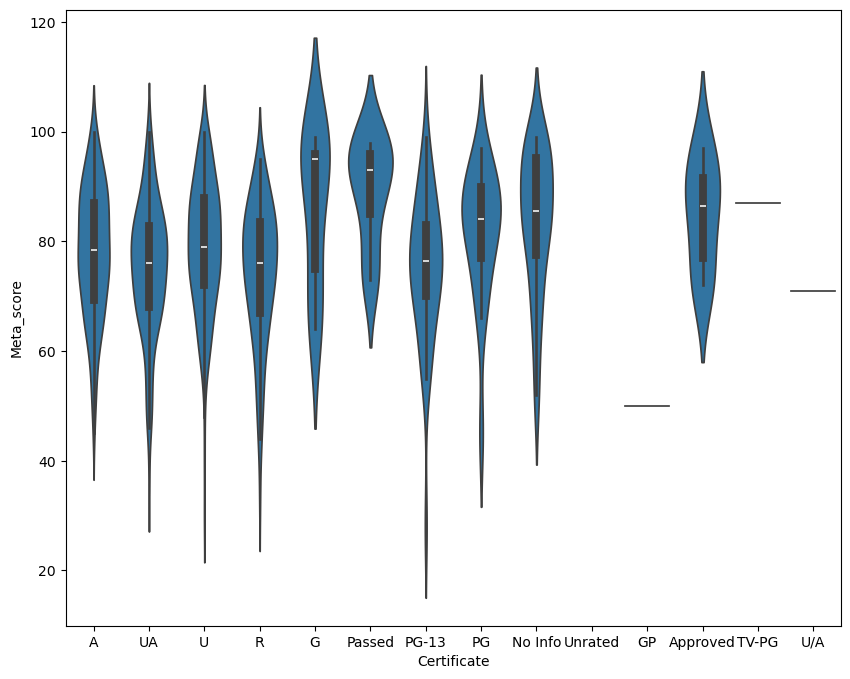

In [71]:
plt.figure(figsize = (10,8))
sns.violinplot(data = filtered_data, x = "Certificate", y = "Meta_score")

# KDE Plots

<p style = "background-color: #f1edfa; font-size:20px"> 
    A <b>Kernel Density Estimate (KDE) plot</b> is a smoothed visualization of a variable’s distribution, providing a continuous estimate of the probability density function (PDF). Unlike histograms, which rely on discrete bins, KDE plots use a kernel function to create a smooth curve, making them useful for understanding the overall distribution of a dataset. They are primarily used for <b>continuous numerical variables</b>, which are plotted on the x-axis, while the y-axis represents the density (a probability estimate). KDE plots are particularly useful for identifying peaks, skewness, and the spread of data. In Python, KDE plots can be generated using pandas, matplotlib, and seaborn. While pandas and matplotlib offer basic KDE plotting capabilities, seaborn provides enhanced functionality with additional customization options, making it a preferred choice for KDE visualizations.
</p>
<section style = "background-color: #f1edfa; font-size:20px"> 
    In Python, KDE plots can be generated using pandas, matplotlib, and seaborn:
<ul>
    <li>Pandas: <b>.plot.kde()</b> to create a KDE plot directly from a DataFrame or Series </li>
    <li>Matplotlib: <b>plt.hist(..., density=True)</b> along with scipy.stats.gaussian_kde for a more manual approach.</li>
    <li>Seaborn: <b>sns.kdeplot()</b> to create well-styled and customizable KDE plots with additional features like multiple distributions and shading.</li>

</ul>
</section>

In [118]:
# Tasks for KDE Plot
# Task 1. Generate KDE Plot with Seaborn, visualize "Gross" column
# Task 2. Generate KDE Plot with Seaborn, visualize "Meta_score"
# Task 3. Generate KDE Plot with Pandas, visualize "No of votes"

In [73]:
# Task 1. KDE Plot with SEABORN showing "Gross" distribution

<Axes: xlabel='Gross', ylabel='Density'>

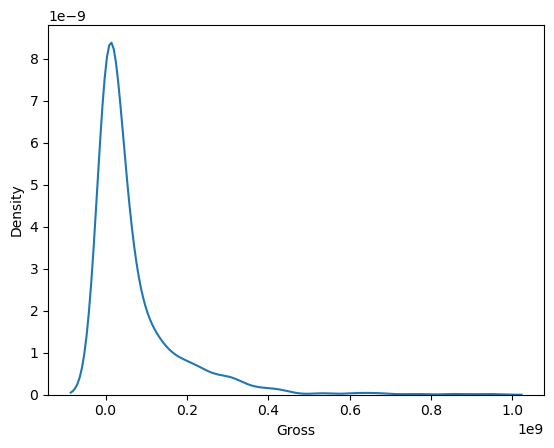

In [114]:
sns.kdeplot(data = data, x = "Gross")

Text(0.5, 0, 'years')

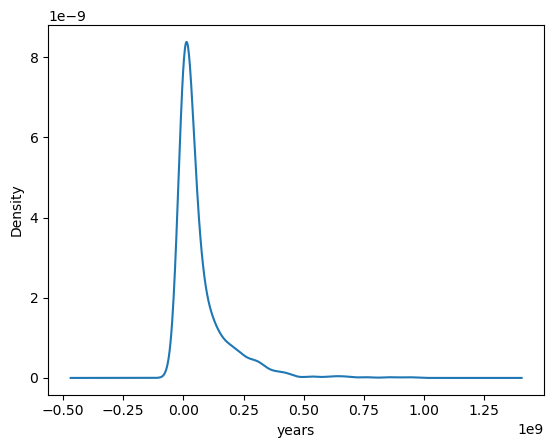

In [113]:
data["Gross"].plot(kind = "kde")
plt.xlabel("years")

In [115]:
# Task 2. Generate KDE Plot with Matplotlib, visualize "Meta_score"

In [124]:
metascore_for_years = data.groupby("Released_Year")["Meta_score"].mean().reset_index()
metascore_for_years = metascore_for_years[~metascore_for_years["Meta_score"].isnull()]
metascore_for_years

,Released_Year,Meta_score
0,0,77.000000
3,1925,97.000000
5,1927,98.000000
7,1930,91.000000
8,1931,99.000000
...,...,...
90,2015,79.789474
91,2016,78.950000
92,2017,79.473684
93,2018,76.166667


<Axes: xlabel='Released_Year', ylabel='Meta_score'>

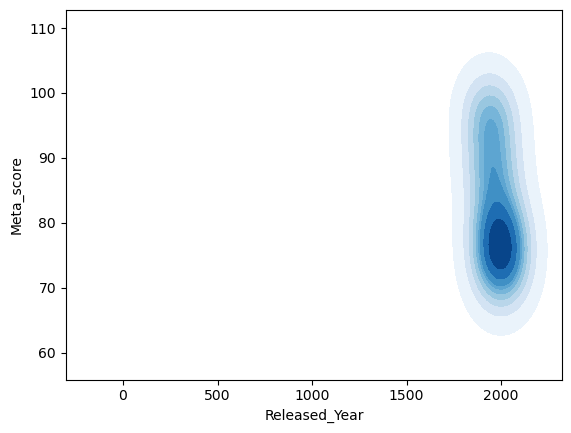

In [127]:
sns.kdeplot(x = metascore_for_years["Released_Year"], y = metascore_for_years["Meta_score"], fill=True, cmap="Blues")

The concentric circles appear because Released_Year is a discrete variable (integer values), while Meta_score is continuous. KDE plots work best when both variables are continuous. Since years are discrete, the KDE method struggles to estimate a smooth density function, leading to those circular artifacts.

<Axes: xlabel='Meta_score', ylabel='Density'>

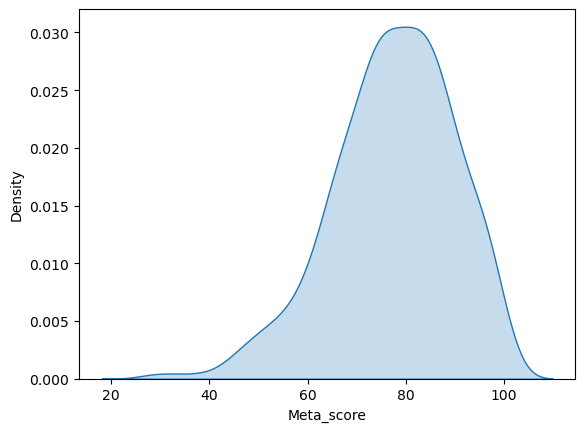

In [135]:
sns.kdeplot(data = data,  x = "Meta_score", fill=True, cmap="Blues")